# Lapse rate

In [1]:
import matplotlib.pyplot as plt
from typhon import plots

import konrad


plots.styles.use('typhon')

After each timestep `konrad` will adjust the atmospheric temperature profile to
follow a specified temperature lapse rate.  This lapse rate will prescribe the
vertical temperature structure up to the convective top. The latter is
diagnosed interactively as the level at which no radiative cooling is left to
fuel convection. From there on, the atmosphere follows a pure radiative
equilibrium.

Here, we will have a look at some of the different options in `konrad.lapserate`.

## Fixed temperature lapse rate

One can specify an arbitrary temperature lapse rate.

Text(0, 0.5, '$p$ / hPa')

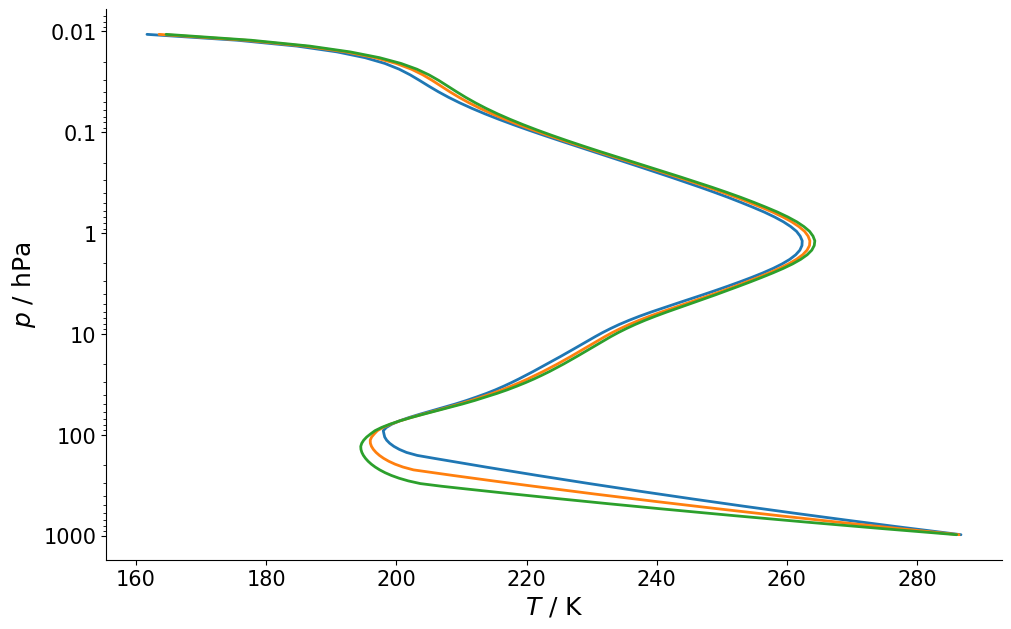

In [2]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

fig, ax = plt.subplots()
for lapserate in [6.5, 8, 10]:
    lapserate = konrad.lapserate.FixedLapseRate(lapserate / 1000)  # K/km -> K/m

    rce = konrad.RCE(
        atmosphere,
        surface=konrad.surface.FixedTemperature(temperature=288.),  # Run with a fixed surface temperature.
        lapserate=lapserate,  # Here, we pass the lapserate component that we just created
        timestep='12h',  # Set timestep in model time.
        max_duration='100d',  # Set maximum runtime.
    )
    rce.run()  # Start the simulation.

    plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")

### Dry-adiabatic lapse rate
There is also a convenience class to represent the dry adiabatic lapse rate.

Text(0, 0.5, '$p$ / hPa')

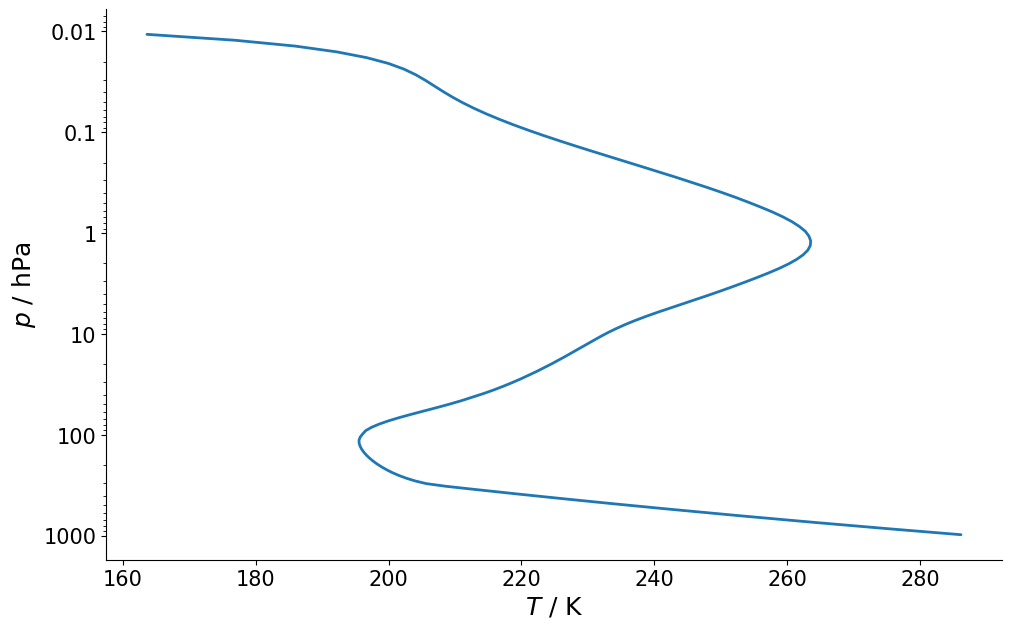

In [3]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(temperature=288.),  # Run with a fixed surface temperature.
    lapserate=konrad.lapserate.DryLapseRate(),  # Run with dry adiabatic lapse rate
    timestep='12h',  # Set timestep in model time.
    max_duration='100d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")

## Moist-adiabat

There is a special class that will compute the moist-adiabatic lapse rate based on the current temperature profile.
This way, we can account for a changing lapse rate in a warming climate

Text(0, 0.5, '$p$ / hPa')

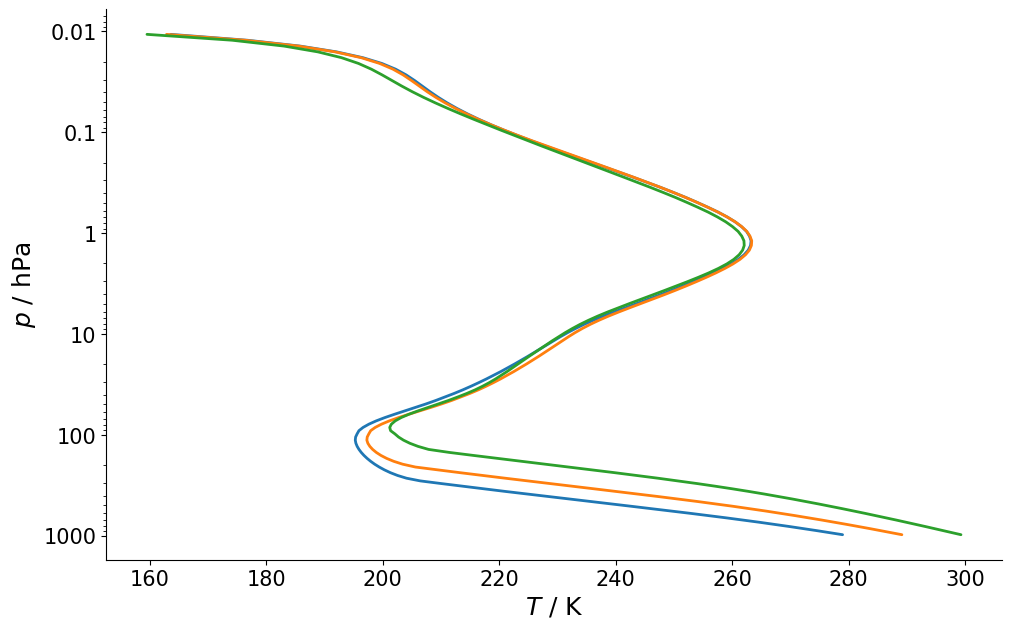

In [4]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

fig, ax = plt.subplots()
for Ts in [280, 290, 300]:
    rce = konrad.RCE(
        atmosphere,
        surface=konrad.surface.FixedTemperature(temperature=Ts),  # Run with a fixed surface temperature.
        lapserate=konrad.lapserate.MoistLapseRate(),  # Here, we pass the lapserate component that we just created
        timestep='12h',  # Set timestep in model time.
        max_duration='100d',  # Set maximum runtime.
    )
    rce.run()  # Start the simulation.

    plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")